<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

What are the weights and bias for the AND perceptron?
Set the weights (weight1, weight2) and bias (bias) to values that will correctly determine the AND operation as shown above.
More than one set of values will work!

__AND__

T + T = T

ALL OTHER FALSE

__OR__

The OR operator requires only one premise to be True for the result to be True.

F + F = F

ALL OTHER TRUE

__NOR__

OPPOSITE OF __OR__

F+F = T

OTHER FALSE

__XOR__

 requires exactly one True and one False value in order to result in True.
 
 T+F = T  
 F+T = T  
 
 T+T = F  
 F+F = F  
 
 



In [ ]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 0.0
weight2 = 0.0
bias = 0.0


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))


NOT Perceptron
Unlike the other perceptrons we looked at, the NOT operation only cares about one input. The operation returns a 0 if the input is 1 and a 1 if it's a 0. The other inputs to the perceptron are ignored.

In this quiz, you'll set the weights (weight1, weight2) and bias bias to the values that calculate the NOT operation on the second input and ignores the first input.

In [ ]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
weight1 = 0.0
weight2 = 0.0
bias = 0.0


# DON'T CHANGE ANYTHING BELOW
# Inputs and outputs
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [True, False, True, False]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
if not num_wrong:
    print('Nice!  You got it all correct.\n')
else:
    print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
print(output_frame.to_string(index=False))

In [ ]:
## algorithm

In [75]:
import numpy as np
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        
        # y[i] = 1, y_hat =0
        #
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
            
            # y[i] = 0, y_hat =1
            
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    
    
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines


In [156]:
#solution
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i],W,b)
        
        # y[i] = 1, y_hat =0
        #
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
            
            # y[i] = 0, y_hat =1
            
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b


In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('data/data.csv')

In [3]:
data_np = np.array(data)

In [4]:
data_np[0:4, :]

array([[ 0.78051 , -0.063669,  1.      ],
       [ 0.28774 ,  0.29139 ,  1.      ],
       [ 0.40714 ,  0.17878 ,  1.      ],
       [ 0.2923  ,  0.4217  ,  1.      ]])

In [5]:
data_np.shape

(100, 3)

In [6]:
X = data_np[:, :-1]
X[0:4, :]

array([[ 0.78051 , -0.063669],
       [ 0.28774 ,  0.29139 ],
       [ 0.40714 ,  0.17878 ],
       [ 0.2923  ,  0.4217  ]])

In [52]:
X[0]

array([ 0.78051 , -0.063669])

In [7]:
y = data_np[:, -1]
y[0:6]

array([1., 1., 1., 1., 1., 1.])

In [8]:
W = np.zeros(X.shape[1])
W

array([0., 0.])

In [9]:
b = 0

algorithm

In [10]:
X.shape

(100, 2)

In [11]:
len(X)

100

In [12]:
#step function

def stepFunction(t):
    if t >= 0:
        return 1
    return 0

In [13]:

stepFunction(7)

1

In [14]:
stepFunction(0)

1

In [15]:
stepFunction(-1)

0

In [16]:
stepFunction(-5)

0

In [17]:
(np.matmul(X,W)+b)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
(np.matmul(X,W)+b)[0]

0.0

In [19]:
# prediction

def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

In [20]:
X[90:91]

array([[0.68122, 0.96541]])

In [21]:
prediction(X[1:8], W, b)

1

In [22]:
from IPython.display import Image

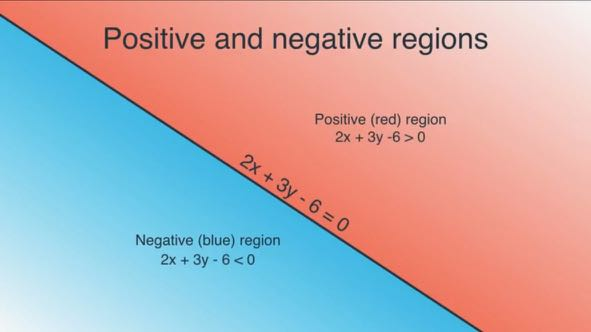

In [23]:
Image('note/perceptron_udacity69.jpg')

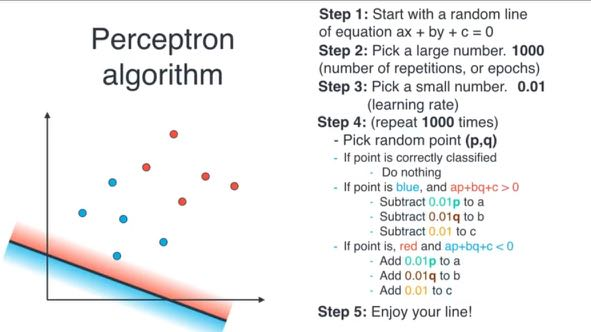

In [24]:
Image('note/perceptron_udacity71.jpg')

In [55]:
#solution
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_hat = prediction(X[i:i+1],W,b)
        
        # y[i] = 1, y_hat =0
        #
        if y[i]-y_hat == 1:
            W[0] += X[i][0]*learn_rate
            W[1] += X[i][1]*learn_rate
            b += learn_rate
            
            # y[i] = 0, y_hat =1
            
        elif y[i]-y_hat == -1:
            W[0] -= X[i][0]*learn_rate
            W[1] -= X[i][1]*learn_rate
            b -= learn_rate
    return W, b

In [56]:
perceptronStep(X,y,W,b)

(array([-0.0771312 , -0.10885777]), 0.08)

In [27]:
for i in range(1000):
    W, b = perceptronStep(X,y,W,b)
print(W,b)

[-0.0795663  -0.10653867] 0.08


In [28]:
0.0784044/0.08

0.980055

In [29]:
0.08/0.08

1.0

$$one * -0.078 + two * -0.107 + 0.08 = 0$$

or 
$$X * -0.078 + y * -0.107 + 0.08 = 0$$

$$ y = -0.98 X + 1$$


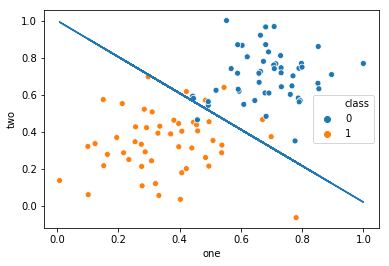

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

y_k = -0.98 * data['one'] +1

sns.scatterplot(data['one'], data['two'], hue = data['class'])
plt.plot(data['one'], y_k)

In [49]:
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 1000):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        
    return (W,b)
    
    

In [50]:
trainPerceptronAlgorithm(X,y)

(array([[-0.08949901],
        [-0.11133288]]), 0.08837196078454462)

In [33]:
import statsmodels.api as sm

In [34]:
  logit = sm.Logit(y, X)

In [35]:
 result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.642169
         Iterations 5


In [36]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Tue, 12 Feb 2019   Pseudo R-squ.:                 0.07355
Time:                        18:17:41   Log-Likelihood:                -64.217
converged:                       True   LL-Null:                       -69.315
                                        LLR p-value:                  0.001408
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1169      1.093      0.107      0.915      -2.025       2.259
x2            -1.2772      1.097     -1.165      0.244      -3.427       0.872
==============================================================================
"""

In [37]:
 logit_data = sm.Logit(data['class'], data[['one','two']] )

In [38]:
 result_data = logit_data.fit()

Optimization terminated successfully.
         Current function value: 0.642169
         Iterations 5


In [39]:
result_data.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Tue, 12 Feb 2019   Pseudo R-squ.:                 0.07355
Time:                        18:17:42   Log-Likelihood:                -64.217
converged:                       True   LL-Null:                       -69.315
                                        LLR p-value:                  0.001408
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
one            0.1169      1.093      0.107      0.915      -2.025       2.259
two           -1.2772      1.097     -1.165      0.244      -3.427       0.872
==============================================================================
"""

In [40]:
np.exp(result_data.params)

one    1.123958
two    0.278826
dtype: float64

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
clf = LogisticRegression(random_state=0, solver='liblinear').fit(data[['one','two']], data['class'])

In [43]:
clf.predict(data[['one','two']])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [44]:
clf.predict_proba(data[['one','two']]) [0:2]

array([[0.30822135, 0.69177865],
       [0.25131819, 0.74868181]])

In [45]:
clf.score(data[['one','two']], data['class'])


0.93

In [46]:
clf.coef_

array([[-2.53561132, -2.72159492]])

In [47]:
clf.intercept_

array([2.61423658])